# PHYS 309 Assignment 1
# Kevin Malone

### Getting started

<ul>
    <li>If you do not already have the <a href="https://www.anaconda.com/products/distribution">Anaconda <tt>python</tt> distribution</a>, click the link to install the individual, free version</li>
    <li>Download this notebook to your own computer, open with <tt>Jupyter</tt> notebook or lab, and complete the missing code. See the <a href="https://docs.jupyter.org/en/latest/start/index.html"><tt>Jupyter</tt> documentation</a> for help.</li>
</ul>

<strong>Instead of putting in the values of physical constants such as $c$ and $\epsilon_0$ by hand, use SI values pre-programmed into [scipy.constants](https://docs.scipy.org/doc/scipy/reference/constants.html). 
For example, $\mu_0$ is <tt>constants.mu_0</tt>. 

### Set up <tt>python</tt> environment

In [2]:
import numpy as np
import matplotlib.pyplot as plt

 # Contains physical constants defined in SI units (default) as well as other systems
from scipy import constants

# Make easily readable plots with large axis labels
plt.rcParams.update({"font.size":16, "axes.labelsize":16, "font.family":"sans-serif", 
                     "font.sans-serif":"Arial"})

### Questions


Recall that the speed of light in vacuum is 
\begin{equation}
c = \frac{1}{\sqrt{\epsilon_0 \mu_0}}, \; \; \; \; \; (1)
\end{equation}
where $\epsilon_0 = 8.85 \times 10^{-12}$ F/m (Farads per meter)$^{*}$ is the electric permittivity of free space and $\mu_0 = 1.26 \times 10^{-6}$ N/A$^2$ (Newtons per Ampere$^2$)$^{**}$ is the magnetic permeability of free space. The electric field created by a point charge $q$ is
\begin{equation}
E = \frac{1}{4 \pi \epsilon_0} \frac{q}{r^2}. \; \; \; \; (2)
\end{equation}
Suppose a charged particle is moving at some fraction of the speed of light in vacuum ($v_q = f c; \; 0 < f < 1$) as seen in reference frame $S$. Reference frame $S^{\prime}$ is co-moving with the point charge, so that $\frac{dx^{\prime}}{dt^{\prime}} = v^{\prime}_q = 0$ in frame $S^{\prime}$. To make the math easier, put $q$ at the origin of $S^{\prime}$.

To understand Einstein's motivation for developing the special theory of relativity, make the <strong>incorrect, erroneous, and wrong</strong> assumption that the Galilean velocity transformation holds true for all values of $f$:
\begin{equation}
\frac{dx^{\prime}}{dt^{\prime}} = \frac{dx}{dt} - v_q \; \; \; (3)
\end{equation}

<ol>
    <li>Assume the charged particle is an electron. Using Equation 2, calculate and plot the electric field as a function of distance $r^{\prime}$ from $q$ in frame $S^{\prime}$. Choose an x-axis range that makes sense to you and label both axes with correct units.</li>
</ol>

Text(0, 0.5, 'Electric Field Strength (N/C)')

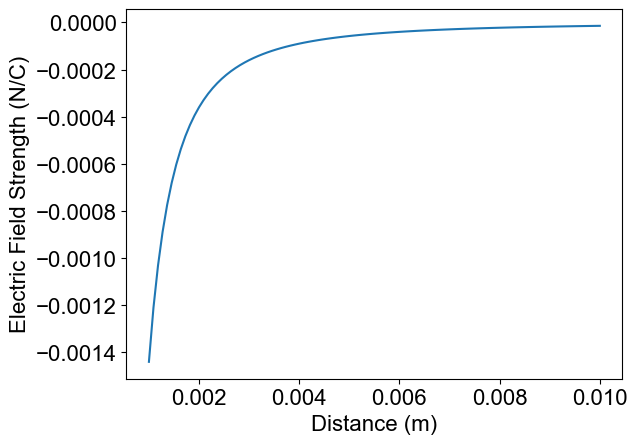

In [3]:
# Plot here

def e_f(r):    #electric field strength at distance r using equation 2. 
    return (-1)*constants.e/(4*constants.pi*constants.epsilon_0*(r**2)) #negative 1 for the electron charge


ri=np.linspace(0.001, 0.01, num=100)#creating a list for the plt function to plot. Will be using this repeatedly.
plt.plot(ri, e_f(ri))#plotting x,f(x).

plt.xlabel("Distance (m)")
plt.ylabel("Electric Field Strength (N/C)")

<ol start=2>
    <li>The Galilean velocity transformation suggests that objects can "catch up" with light, so that light in a vacuum appears to be going slower than the value of $c$ from Equation (1). Make a plot of $c^{\prime}$, the <strong>incorrect</strong> speed of light in frame $S^{\prime}$ according to the Galilean transformation, as a function of $f$. Put units on the axes where appropriate.</li>
</ol>

Text(0, 0.5, 'speed of light (m/s)')

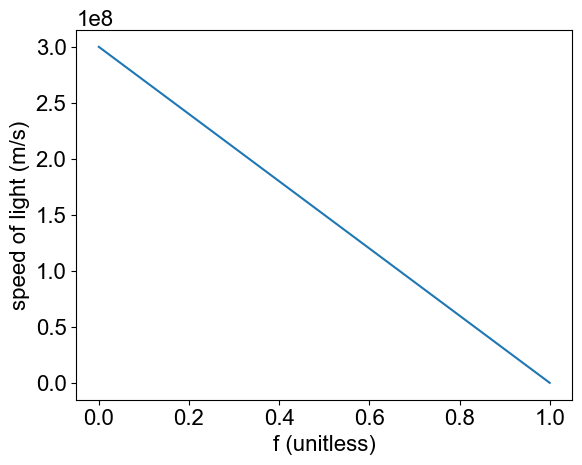

In [33]:
# Plot here

def false_sl(f):#calculating the speed of light IF it followed equation 3, and was NOT constant, hence the name false speed of light
    return constants.c -f*constants.c #using f as a value between 1 and 0 for a decimal fraction of the speed of light

f=np.linspace(0.0001, 1, num=100, endpoint=True)

plt.plot(f, false_sl(f))

plt.xlabel("f (unitless)")
plt.ylabel("speed of light (m/s)")

<ol start=3>
    <li>In frame $S^{\prime}$, something has to give: either Equation (1) is no longer true, or the values of $\epsilon_0$ and/or $\mu_0$ have to change. Suppose Equation (1) is still true and $\mu_0 = \mu_0^{\prime}$. Make a plot with two vertically stacked subplots. The top subplot should show $\epsilon_0^{\prime}$ as a function of $f$, while the bottom plot should show the electric field $E^{\prime} = \frac{1}{4 \pi \epsilon_0^{\prime}} \frac{q}{{r^{\prime}}^2}$ at $r^{\prime} = 1 \mu \mathrm{m} = 10^{-6}$ m as a function of $f$. Put units on the axes where appropriate.</li>
</ol>

Text(0.5, 0, 'f (unitless)')

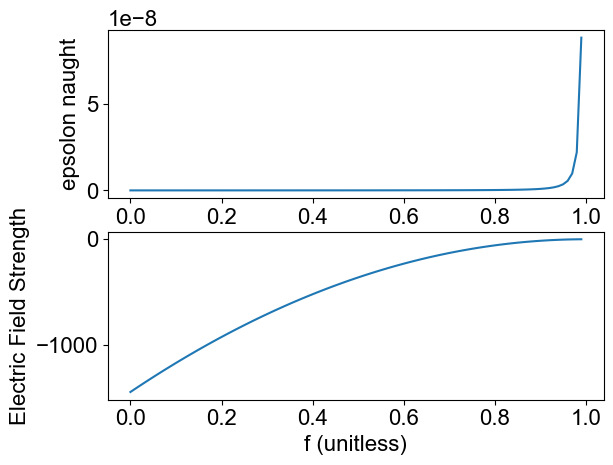

In [34]:
# Plot here
#We need to isolate epsilon naught to see what happens if it changes, so we first set up equation 3 with the speed of light:
#c'=v-c
#Then we plug in the value for c in equation 1 into c':
#1/((constants.epsilon_0*constants.mu_0)**(1/2))=v-c
#and isolate epsilon naught, substituting f for v
# constants.epsilon_0=1/constants.mu_0*(f-c)^2

def f_e (f):#then we make a function that represents this value of epsilon naught if it changes
    return 1/(constants.mu_0*((constants.c-f*constants.c)**2))

def ef (f):#and we make a function that represents the electric field as epsilon naught changes with r=10^-6m 
    return (-1)*constants.e/(4*constants.pi*((10**(-6))**2)*1/(constants.mu_0*((constants.c-f*constants.c)**2)))

f=np.linspace(0, 1, num=100, endpoint=False)

plt.figure
plt.subplot(211)
plt.plot(f, f_e(f))
plt.ylabel("epsilon naught")

plt.subplot(212)
plt.plot(f, ef(f))

plt.ylabel("Electric Field Strength")
plt.xlabel("f (unitless)")

<ol start=4>
    <li>Now assume $f = 0.5$. In the same plot window, plot $E^{\prime}(r^{\prime})$ given by Equation 2 (same curve as in Problem 1) <em>and</em> $E^{\prime}(r^{\prime})$ calculated as in Problem 3, where $\epsilon_0^{\prime}$ is a function of $f$. Do you notice a problem?</li>
</ol>

Text(0.5, 0, 'r (m)')

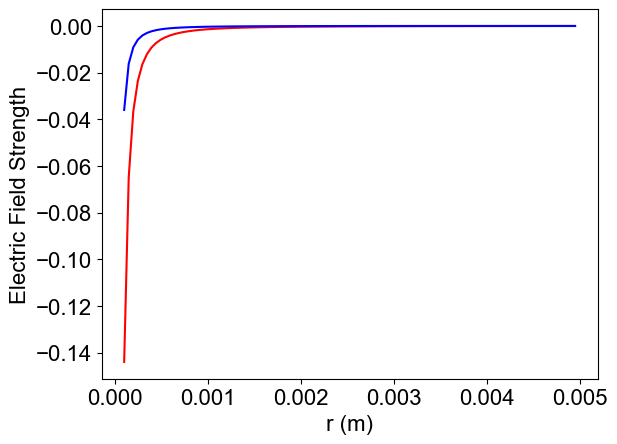

In [35]:
# Plot here
def e_f1 (r):#electric field with a constant epsilon naught
    return (-1)*constants.e/(4*constants.pi*constants.epsilon_0*r**2)


def e_f2 (r):#electric field with the epsilon naught calculated in the previous problem
    return (-1)*constants.e/((4*constants.pi*r**2)*1/(constants.mu_0*((constants.c-.5*constants.c)**2)))

r=np.linspace(0.0001, .005, num=100, endpoint=False)

plt.plot(r, e_f1(r), "r")
plt.plot(r, e_f2(r), "b")

plt.ylabel("Electric Field Strength")
plt.xlabel("r (m)")

<ol start=5>
    <li>To resolve the issues revealed by the plot from Problem 4, you may suggest setting $\epsilon_0^{\prime} = \epsilon_0$ and allowing $\mu_0^{\prime}$ to vary with $f$. Let's explore that solution. To accompany the point charge in problems 1-4, add a current loop that's also at rest in frame $S^{\prime}$. Recall that the magnitude of the magnetic field strength at the center of the loop in frame $S$ is $B = \frac{\mu_0 I}{2R}$, where $I$ is the current and $R$ is the radius of the loop. Suppose $I = 1$ A and $R = 1$ m. Assume $E^{\prime} = E$, $B^{\prime} = B$, and $c^{\prime}$ depends on $f$ as in problem 2. Plot $\mu_0$ as a function of $f$.</li>
</ol>

Text(0, 0.5, 'mue naught')

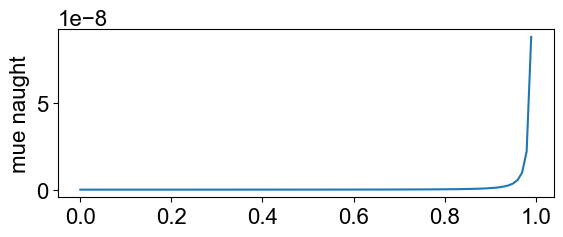

In [28]:
# Plot here
#def e_f (r):
#    return (-1)*constants.e/((4*constants.pi*r**2)*1/(constants.epsilon_0*((constants.c-.5*constants.c)**2)))

def u_from_f (f):#assuming epsilon naught is constant and seeing if mue naught changes
    return 1/(constants.epsilon_0*(constants.c-f*constants.c)**2)

f=np.linspace(0, 1, num=100, endpoint=False)

plt.figure
plt.subplot(211)
plt.plot(f, f_e(f))
plt.ylabel("mue naught")

<ol start=6>
<li>If we calculate $c^{\prime}$ using the Galilean transformation in Equation 3, is there any value of $f$ for which $E^{\prime} = E$ <strong>and</strong> $B^{\prime} = B$? Make a graph to illustrate your answer.</li>
</ol>

Text(0.5, 0, 'f (unitless)')

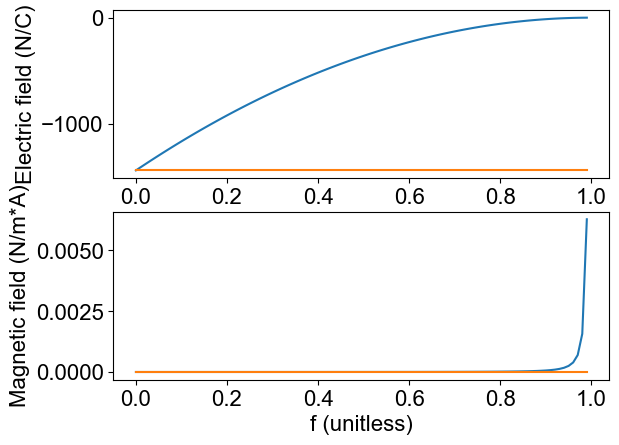

In [32]:
# Plot here
def ep (f):#electric field with the calculated epsilon naught
    return (-1)*constants.e/(4*constants.pi*(1/(constants.mu_0*((constants.c-f*constants.c)**2)))*((10**(-6))**2))
def e(f):#electric field with a constant epsilon naught
    return f*0+(-1)*constants.e/(4*constants.pi*constants.epsilon_0*((10**(-6))**2))
def bp(f):#magnetic field with the caclulated mue naught
    return (1/(constants.epsilon_0*(constants.c-f*constants.c)**2))/2
def b(f):#magnetic field with a constant mue naught
    return f*0+constants.mu_0/2


plt.figure
plt.subplot(211)
plt.plot(f, ep(f))
plt.plot(f, e(f))
plt.ylabel("Electric field (N/C)")

plt.subplot(212)
plt.plot(f, bp(f))
plt.plot(f, b(f))


plt.ylabel("Magnetic field (N/m*A)")
plt.xlabel("f (unitless)")

Both values of E and B only match when f=0.

Conceptual questions about the conflict between the Galilean velocity transformation and E&M are in the written homework assignment.

$^{*}$Farad = Coulomb/Volt: Farad is the unit of capacitance, which measures the amount of charge necessary to increase the electric potential of a system by 1 Volt. Farads/meter measure how much capacitance you get per meter of free space between yourself and a charged particle.

$^{**}$Newtons/Ampere$^2$ = Newtons/(Coulombs/second)$^2$. $\mu_0$ measures how effective inductance is at creating magnetic force in free space.